## [作業目標]

使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵

觀察上述離散化特徵, 對於目標值的預測有沒有幫助

## [作業重點]

仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/'

## 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [19]:
pd.cut(app_train['YEARS_BIRTH'], bins= [20,30,40,50,60,70]).value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: YEARS_BIRTH, dtype: int64

In [16]:
app_train[["TARGET", "YEARS_BIRTH"]].head(10)

,TARGET,YEARS_BIRTH
0,1,25.920548
1,0,45.931507
2,0,52.180822
3,0,52.068493
4,0,54.608219
5,0,46.413699
6,0,37.747945
7,0,51.643836
8,0,55.065753
9,0,39.641096


Text(0.5,1,'YEARS_BIRTH_DISCRET to TARGET bar plot')

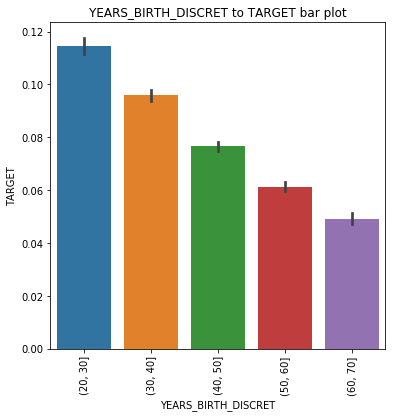

In [37]:
# sns.barplot 畫出 YEARS_BIRTH_DISCRET, TARGET 在列聯表中，各組(bins) YEARS_BIRTH_DISCRET 的人數當中 TARGET == 1 的比例
app_train['YEARS_BIRTH_DISCRET'] = pd.cut(app_train['YEARS_BIRTH'], bins= [20,30,40,50,60,70])

plt.figure(figsize=(6,6))
ax = sns.barplot(app_train['YEARS_BIRTH_DISCRET'], app_train['TARGET'])
plt.xticks(rotation = 90)
ax.set_title('YEARS_BIRTH_DISCRET to TARGET bar plot')

In [30]:
# corss table 列聯表
pd.crosstab(app_train['YEARS_BIRTH_DISCRET'],app_train['TARGET'])

TARGET,0,1
YEARS_BIRTH_DISCRET,,
"(20, 30]",39863,5158
"(40, 50]",74420,7888
"(50, 60]",70685,5856
"(30, 40]",63890,4172
"(60, 70]",33828,1751


In [38]:
5158 / (39863+5158)

0.11456875680238111

In [21]:
app_train['YEARS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']) / 365
app_train['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [24]:
pd.cut(app_train['YEARS_EMPLOYED'], bins= list(range(0, 50, 5))).value_counts()

(0, 5]      136309
(5, 10]      64872
(10, 15]     27549
(15, 20]     10849
(20, 25]      6243
(25, 30]      3308
(30, 35]      1939
(35, 40]       832
(40, 45]       210
Name: YEARS_EMPLOYED, dtype: int64

Text(0.5,1,'YEARS_EMPLOYED_DISCRET to TARGET bar plot')

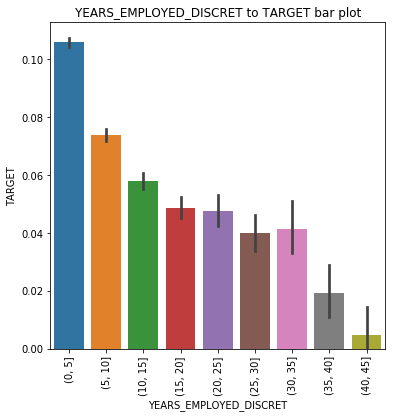

In [27]:
app_train['YEARS_EMPLOYED_DISCRET'] = pd.cut(app_train['YEARS_EMPLOYED'], bins= list(range(0, 50, 5)) )

plt.figure(figsize=(6,6))
ax = sns.barplot(app_train['YEARS_EMPLOYED_DISCRET'], app_train['TARGET'])
plt.xticks(rotation = 90)
ax.set_title('YEARS_EMPLOYED_DISCRET to TARGET bar plot')

In [50]:
app_train["YEARS_EMPLOYED_DISCRET_qcut"] = pd.qcut(app_train["YEARS_EMPLOYED"], 5)
# app_train["YEARS_EMPLOYED_DISCRET_qcut"].value_counts()
pd.qcut(app_train["YEARS_EMPLOYED"], 5).value_counts()

(-0.001, 1.69]      50511
(10.071, 49.074]    50428
(1.69, 3.425]       50409
(5.918, 10.071]     50399
(3.425, 5.918]      50390
Name: YEARS_EMPLOYED, dtype: int64

Text(0.5,1,'YEARS_EMPLOYED_DISCRET_qcut to TARGET bar plot')

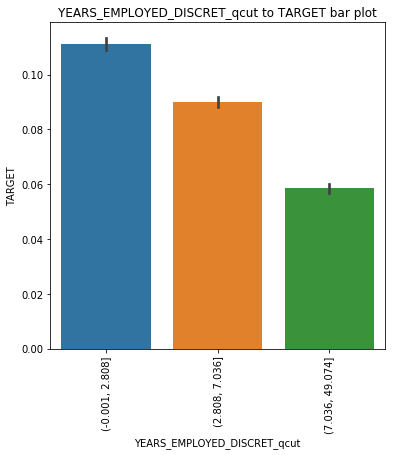

In [48]:
app_train["YEARS_EMPLOYED_DISCRET_qcut"] = pd.qcut(app_train["YEARS_EMPLOYED"], 3)

plt.figure(figsize=(6,6))
ax = sns.barplot(app_train['YEARS_EMPLOYED_DISCRET_qcut'], app_train['TARGET'])
plt.xticks(rotation = 90)
ax.set_title('YEARS_EMPLOYED_DISCRET_qcut to TARGET bar plot')